In [8]:
import pandas as pd
import matplotlib.pyplot
from scipy import stats

data = pd.read_csv("HospitalAdmissionsData.csv") 
df = pd.DataFrame(data)
df

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda
...,...,...,...,...,...,...,...,...,...,...
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis


In [2]:
print("10 column headers")
print("5 integer column data / 1 float column data")

10 column headers
5 integer column data / 1 float column data


In [10]:
print("All possible insurance types are: ")
df.Insurance_Type.unique()

All possible insurance types are: 


array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [18]:
print("summary statistics for the admission length")
df[["AdmissionLengthDays"]].describe()

summary statistics for the admission length


,AdmissionLengthDays
count,58863.000000
mean,10.138978
std,12.465611
min,-0.945139
25%,3.743056
50%,6.465972
75%,11.798264
max,294.660417


In [27]:
print("most common")
df.mode(dropna=False)

most common


,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,1,5.28125,0.0,emergency,medicare,1.0,catholic,0.0,white,newborn
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58858,58972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58859,58973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58860,58974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58861,58975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a207810d0>],
      dtype=object)

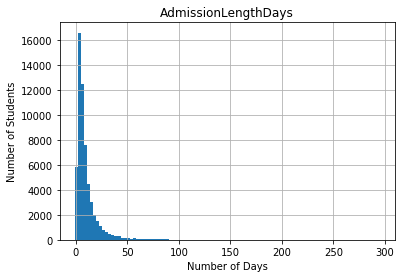

In [43]:
hist = df.hist(column='AdmissionLengthDays', bins=100)
hist = hist[0]
for x in hist:
    x.set_xlabel("Number of Days")
for y in hist:
    y.set_ylabel("Number of Students")
hist

In [85]:
print(df[['AdmissionLengthDays', 'Death_1']])
print(df['AdmissionLengthDays'][df['Death_1'] == 0])
avg_no_death = df['AdmissionLengthDays'][df['Death_1'] == 0].mean()
avg_death = df['AdmissionLengthDays'][df['Death_1'] == 1].mean()
print("Avg with no Death")
print(avg_no_death)
print("Avg with Death")
print(avg_death)

       AdmissionLengthDays  Death_1
0                 4.277778        0
1                26.122917        0
2                 7.028472        1
3                34.187500        0
4                 6.165972        0
...                    ...      ...
58858            12.177083        0
58859            10.613889        0
58860             1.095139        0
58861             2.925000        0
58862             2.851389        0

[58863 rows x 2 columns]
0         4.277778
1        26.122917
3        34.187500
4         6.165972
5         3.286806
           ...    
58858    12.177083
58859    10.613889
58860     1.095139
58861     2.925000
58862     2.851389
Name: AdmissionLengthDays, Length: 53011, dtype: float64
Avg with no Death
10.140012332344613
Avg with Death
10.129605856532672


In [91]:
print(df['Death_1'].value_counts())

0    53011
1     5852
Name: Death_1, dtype: int64


In [93]:
df2 = df['Insurance_Type'][df['Death_1'] == 1]
print(df2)

2        medicare
29       medicaid
31        private
34        private
35       medicare
           ...   
58811    medicare
58824    medicare
58838    medicare
58839    medicare
58846     private
Name: Insurance_Type, Length: 5852, dtype: object


In [95]:
print(df2.value_counts())

medicare      3904
private       1382
medicaid       381
self pay        95
government      90
Name: Insurance_Type, dtype: int64
